# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 02. Data

In [2]:
dr = pd.read_pickle(r"C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\driverID.pkl")
cn = pd.read_pickle(r"C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\constructorID.pkl")
circ = pd.read_pickle(r"C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\circuitID.pkl")
stat = pd.read_pickle(r"C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\status.pkl")
year = pd.read_pickle(r"C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\seasons.pkl")
drstand = pd.read_pickle(r"C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\driver_standings.pkl")
cnstand = pd.read_pickle(r"C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\constructor_standings.pkl")

In [3]:
drstand.head()

driverStandingsId  raceId  driverId  points  position positionText  wins
0                  1      18         1    10.0         1            1     1
1                  2      18         2     8.0         2            2     0
2                  3      18         3     6.0         3            3     0
3                  4      18         4     5.0         4            4     0
4                  5      18         5     4.0         5            5     0

In [4]:
cnstand.head()

constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       2      18              2     8.0         3   
2                       3      18              3     9.0         2   
3                       4      18              4     5.0         4   
4                       5      18              5     2.0         5   

  positionText  wins  
0            1     1  
1            3     0  
2            2     0  
3            4     0  
4            5     0

In [12]:
rcres = pd.read_pickle(r"C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\race_results.pkl")
rc = pd.read_pickle(r"C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\races.pkl")

In [13]:
rc.head()

raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time quali_date quali_time sprint_date sprint_time  
0  06:00:00         \N         \N          \N          \N  
1  09:00:00         \N         \N          \N          \N  
2  07:00:00         \N         \N          \N          \N  
3  12:00:00         \N         \N          \N          \N  
4  12:00:00         \N         \N          \N          \N

In [14]:
#dropping columns
rc = rc.drop(['time','quali_date','quali_time','sprint_date','sprint_time'], axis = 1)
rc = rc.rename(columns = {'name':'grandPrix','year':'season'})

In [15]:
rc.head()

raceId  season  round  circuitId              grandPrix        date
0       1    2009      1          1  Australian Grand Prix  2009-03-29
1       2    2009      2          2   Malaysian Grand Prix  2009-04-05
2       3    2009      3         17     Chinese Grand Prix  2009-04-19
3       4    2009      4          3     Bahrain Grand Prix  2009-04-26
4       5    2009      5          4     Spanish Grand Prix  2009-05-10

In [16]:
circ.head(1)

circuitId   circuitRef                            name   location  \
0          1  albert_park  Albert Park Grand Prix Circuit  Melbourne   

     country      lat      lng alt  
0  Australia -37.8497  144.968  10

In [17]:
#dropping columns
circ = circ.drop(['circuitRef','lat','lng','alt'], axis = 1)
#renaming columns
circ = circ.rename(columns = {'name':'circuit'})
circ.head(1)

circuitId                         circuit   location    country
0          1  Albert Park Grand Prix Circuit  Melbourne  Australia

In [21]:
#merge on circuit id
rc_circ = rc.merge(circ, on = 'circuitId')
rc_circ.head(1)

raceId  season  round  circuitId              grandPrix        date  \
0       1    2009      1          1  Australian Grand Prix  2009-03-29   

                          circuit   location    country  
0  Albert Park Grand Prix Circuit  Melbourne  Australia

In [22]:
rcres.head(1)

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1

In [24]:
#merge on race id
res = rcres.merge(rc_circ, on = 'raceId')
res.head(1)

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   

  positionText  positionOrder  points  ...  fastestLapSpeed statusId season  \
0            1              1    10.0  ...          218.300        1   2008   

  round circuitId              grandPrix        date  \
0     1         1  Australian Grand Prix  2008-03-16   

                          circuit   location    country  
0  Albert Park Grand Prix Circuit  Melbourne  Australia  

[1 rows x 26 columns]

In [26]:
res.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'season', 'round', 'circuitId',
       'grandPrix', 'date', 'circuit', 'location', 'country'],
      dtype='object')

In [27]:
#dropping non-numeric columns
res = res.drop(['number','positionText','time','country','points'], axis = 1)
res.head()

resultId  raceId  driverId  constructorId  grid position  positionOrder  \
0         1      18         1              1     1        1              1   
1         2      18         2              2     5        2              2   
2         3      18         3              3     7        3              3   
3         4      18         4              4    11        4              4   
4         5      18         5              1     3        5              5   

   laps milliseconds fastestLap  ... fastestLapTime fastestLapSpeed statusId  \
0    58      5690616         39  ...       1:27.452         218.300        1   
1    58      5696094         41  ...       1:27.739         217.586        1   
2    58      5698779         41  ...       1:28.090         216.719        1   
3    58      5707797         58  ...       1:28.603         215.464        1   
4    58      5708630         43  ...       1:27.418         218.385        1   

   season  round  circuitId              grandPrix        date  \
0    2008      1          1  Australian Grand Prix  2008-03-16   
1    2008      1          1  Australian Grand Prix  2008-03-16   
2    2008      1          1  Australian Grand Prix  2008-03-16   
3    2008      1          1  Australian Grand Prix  2008-03-16   
4    2008      1          1  Australian Grand Prix  2008-03-16   

                          circuit   location  
0  Albert Park Grand Prix Circuit  Melbourne  
1  Albert Park Grand Prix Circuit  Melbourne  
2  Albert Park Grand Prix Circuit  Melbourne  
3  Albert Park Grand Prix Circuit  Melbourne  
4  Albert Park Grand Prix Circuit  Melbourne  

[5 rows x 21 columns]

In [29]:
#renaming columns
drstand = drstand.rename(columns = {'points':'driverPoints','position':'standing'}).drop(['positionText'], axis = 1)
drstand.head(1)

driverStandingsId  raceId  driverId  driverPoints  standing  wins
0                  1      18         1          10.0         1     1

In [30]:
#renaming columns
cnstand = cnstand.rename(columns = {'points':'constructorPoints','position':'constructorStanding'}).drop(['positionText'], axis = 1)
cnstand.head(1)

constructorStandingsId  raceId  constructorId  constructorPoints  \
0                       1      18              1               14.0   

   constructorStanding  wins  
0                    1     1

In [32]:
cn.columns

Index(['constructorId', 'constructorRef', 'name', 'con_nat'], dtype='object')

In [33]:
#merging all data frames
res = res.merge(drstand, on = ['raceId','driverId']).merge(cnstand, on = ['constructorId','raceId'])
res.head(1)

resultId  raceId  driverId  constructorId  grid position  positionOrder  \
0         1      18         1              1     1        1              1   

   laps milliseconds fastestLap  ...                         circuit  \
0    58      5690616         39  ...  Albert Park Grand Prix Circuit   

    location driverStandingsId  driverPoints  standing  wins_x  \
0  Melbourne                 1          10.0         1       1   

   constructorStandingsId constructorPoints constructorStanding wins_y  
0                       1              14.0                   1      1  

[1 rows x 29 columns]

In [34]:
#renaming missed columns
res = res.rename(columns = {'wins_x':'driverWins','wins_y':'constructorWins'})
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23839 entries, 0 to 23838
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   resultId                23839 non-null  int64  
 1   raceId                  23839 non-null  int64  
 2   driverId                23839 non-null  int64  
 3   constructorId           23839 non-null  int64  
 4   grid                    23839 non-null  int64  
 5   position                23839 non-null  object 
 6   positionOrder           23839 non-null  int64  
 7   laps                    23839 non-null  int64  
 8   milliseconds            23839 non-null  object 
 9   fastestLap              23839 non-null  object 
 10  rank                    23839 non-null  object 
 11  fastestLapTime          23839 non-null  object 
 12  fastestLapSpeed         23839 non-null  object 
 13  statusId                23839 non-null  int64  
 14  season                  23839 non-null

In [69]:
#dropping non-numeric columns
res_sub = res.drop(['fastestLapTime','grandPrix','date','circuit','location'], axis = 1)
res_sub.head()

resultId  raceId  driverId  constructorId  grid position  positionOrder  \
0         1      18         1              1     1        1              1   
1         5      18         5              1     3        5              5   
2         2      18         2              2     5        2              2   
3         3      18         3              3     7        3              3   
4         6      18         6              3    13        6              6   

   laps milliseconds fastestLap  ... round circuitId  driverStandingsId  \
0    58      5690616         39  ...     1         1                  1   
1    58      5708630         43  ...     1         1                  5   
2    58      5696094         41  ...     1         1                  2   
3    58      5698779         41  ...     1         1                  3   
4    57           \N         50  ...     1         1                  6   

   driverPoints  standing  driverWins  constructorStandingsId  \
0          10.0         1           1                       1   
1           4.0         5           0                       1   
2           8.0         2           0                       2   
3           6.0         3           0                       3   
4           3.0         6           0                       3   

   constructorPoints  constructorStanding  constructorWins  
0               14.0                    1                1  
1               14.0                    1                1  
2                8.0                    3                0  
3                9.0                    2                0  
4                9.0                    2                0  

[5 rows x 24 columns]

In [46]:
res_sub.dtypes

resultId                    int64
raceId                      int64
driverId                    int64
constructorId               int64
grid                        int64
position                   object
positionOrder               int64
laps                        int64
milliseconds               object
fastestLap                 object
rank                       object
fastestLapSpeed            object
statusId                    int64
season                      int64
round                       int64
circuitId                   int64
driverStandingsId           int64
driverPoints              float64
standing                    int64
driverWins                  int64
constructorStandingsId      int64
constructorPoints         float64
constructorStanding         int64
constructorWins             int64
dtype: object

In [61]:
res_sub[['fastestLapSpeed','rank','fastestLap']].value_counts()

fastestLapSpeed  rank  fastestLap
\N               \N    \N            16160
                 0     \N              209
211.782          1     28                1
211.867          17    24                1
211.861          19    59                1
                                     ...  
196.741          12    54                1
196.736          7     49                1
196.729          9     52                1
196.725          2     48                1
204.328          9     46                1
Length: 7472, dtype: int64

In [70]:
res_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23839 entries, 0 to 23838
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   resultId                23839 non-null  int64  
 1   raceId                  23839 non-null  int64  
 2   driverId                23839 non-null  int64  
 3   constructorId           23839 non-null  int64  
 4   grid                    23839 non-null  int64  
 5   position                23839 non-null  object 
 6   positionOrder           23839 non-null  int64  
 7   laps                    23839 non-null  int64  
 8   milliseconds            23839 non-null  object 
 9   fastestLap              23839 non-null  object 
 10  rank                    23839 non-null  object 
 11  fastestLapSpeed         23839 non-null  object 
 12  statusId                23839 non-null  int64  
 13  season                  23839 non-null  int64  
 14  round                   23839 non-null

In [71]:
#Set uses '\N' in place of missing values. Python tries to read as unicode and errors out. Exporting to manually fix.
res.to_csv(r"C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\res_sub.csv")

In [3]:
#importing after fix
res_sub = pd.read_csv(r"C:\Users\jmanc\OneDrive\Desktop\F1 Project\Data\Prepped Data\res_sub.csv")
res_sub.head()

resultId  raceId  driverId  constructorId  grid  position  positionOrder  \
0         1      18         1              1     1       1.0              1   
1         5      18         5              1     3       5.0              5   
2         2      18         2              2     5       2.0              2   
3         3      18         3              3     7       3.0              3   
4         6      18         6              3    13       6.0              6   

   laps  milliseconds  fastestLap  ...                         circuit  \
0    58     5690616.0        39.0  ...  Albert Park Grand Prix Circuit   
1    58     5708630.0        43.0  ...  Albert Park Grand Prix Circuit   
2    58     5696094.0        41.0  ...  Albert Park Grand Prix Circuit   
3    58     5698779.0        41.0  ...  Albert Park Grand Prix Circuit   
4    57           NaN        50.0  ...  Albert Park Grand Prix Circuit   

    location  driverStandingsId  driverPoints  standing  driverWins  \
0  Melbourne                  1          10.0         1           1   
1  Melbourne                  5           4.0         5           0   
2  Melbourne                  2           8.0         2           0   
3  Melbourne                  3           6.0         3           0   
4  Melbourne                  6           3.0         6           0   

   constructorStandingsId constructorPoints constructorStanding  \
0                       1              14.0                   1   
1                       1              14.0                   1   
2                       2               8.0                   3   
3                       3               9.0                   2   
4                       3               9.0                   2   

  constructorWins  
0               1  
1               1  
2               0  
3               0  
4               0  

[5 rows x 28 columns]

In [4]:
res_sub=res_sub.dropna()

In [5]:
res_sub.dtypes

resultId                    int64
raceId                      int64
driverId                    int64
constructorId               int64
grid                        int64
position                  float64
positionOrder               int64
laps                        int64
milliseconds              float64
fastestLap                float64
rank                      float64
fastestLapTime             object
fastestLapSpeed           float64
statusId                    int64
season                      int64
round                       int64
circuitId                   int64
grandPrix                  object
circuit                    object
location                   object
driverStandingsId           int64
driverPoints              float64
standing                    int64
driverWins                  int64
constructorStandingsId      int64
constructorPoints         float64
constructorStanding         int64
constructorWins             int64
dtype: object

In [6]:
res_sub= res_sub.drop(['grandPrix','circuit','location','fastestLapTime'], axis = 1)

# 03. Correlation Check

In [78]:
res_sub.corr()

resultId    raceId  driverId  constructorId      grid  \
resultId                1.000000  0.941645  0.536714       0.343968  0.050754   
raceId                  0.941645  1.000000  0.584485       0.364731  0.031834   
driverId                0.536714  0.584485  1.000000       0.104533  0.213113   
constructorId           0.343968  0.364731  0.104533       1.000000  0.041324   
grid                    0.050754  0.031834  0.213113       0.041324  1.000000   
position                0.106628  0.081980  0.267363       0.078383  0.675418   
positionOrder           0.106628  0.081980  0.267363       0.078383  0.675418   
laps                   -0.099909 -0.070237 -0.065806      -0.034572 -0.098417   
milliseconds            0.173172  0.159986  0.089458       0.061627  0.097388   
fastestLap              0.327221  0.295404  0.149671       0.099177  0.059479   
rank                    0.089264  0.073164  0.221922       0.075227  0.520379   
fastestLapSpeed        -0.057072 -0.024268  0.039991       0.024662 -0.037915   
statusId                0.008942  0.009874  0.018841      -0.009934 -0.012747   
season                  0.850847  0.882858  0.634203       0.389604  0.032728   
round                   0.051633  0.053822  0.032730       0.007072  0.029166   
circuitId               0.288871  0.312056  0.227001       0.148891  0.010291   
driverStandingsId       0.868438  0.843281  0.462823       0.297340  0.033532   
driverPoints            0.280596  0.279635 -0.077827       0.084257 -0.424853   
standing                0.053914  0.034044  0.275911       0.077725  0.663668   
driverWins              0.004399  0.014265 -0.191602       0.055922 -0.358514   
constructorStandingsId  0.754961  0.754986  0.427433       0.270175  0.014910   
constructorPoints       0.288294  0.287325 -0.060439       0.089448 -0.412682   
constructorStanding     0.024843  0.011055  0.258517       0.069173  0.594282   
constructorWins         0.006297  0.017463 -0.177925       0.071900 -0.406922   

                        position  positionOrder      laps  milliseconds  \
resultId                0.106628       0.106628 -0.099909      0.173172   
raceId                  0.081980       0.081980 -0.070237      0.159986   
driverId                0.267363       0.267363 -0.065806      0.089458   
constructorId           0.078383       0.078383 -0.034572      0.061627   
grid                    0.675418       0.675418 -0.098417      0.097388   
position                1.000000       1.000000 -0.125017      0.090555   
positionOrder           1.000000       1.000000 -0.125017      0.090555   
laps                   -0.125017      -0.125017  1.000000      0.111599   
milliseconds            0.090555       0.090555  0.111599      1.000000   
fastestLap              0.046619       0.046619  0.393885      0.110336   
rank                    0.659380       0.659380 -0.094196      0.076691   
fastestLapSpeed        -0.042670      -0.042670 -0.448696     -0.471358   
statusId                0.013066       0.013066 -0.030711     -0.012144   
season                  0.092125       0.092125 -0.064276      0.130932   
round                   0.024328       0.024328 -0.048595      0.039085   
circuitId               0.034460       0.034460 -0.138091     -0.015929   
driverStandingsId       0.062601       0.062601 -0.087824      0.138930   
driverPoints           -0.490773      -0.490773  0.024150      0.002658   
standing                0.776113       0.776113 -0.102974      0.098201   
driverWins             -0.422851      -0.422851  0.041341     -0.033126   
constructorStandingsId  0.038866       0.038866 -0.072279      0.126049   
constructorPoints      -0.459778      -0.459778  0.024112     -0.001165   
constructorStanding     0.680712       0.680712 -0.095684      0.098245   
constructorWins        -0.453056      -0.453056  0.053471     -0.043775   

                        fastestLap  ...     round  circuitId  \
resultId                  0.327221  ...  0.051633   0.2888

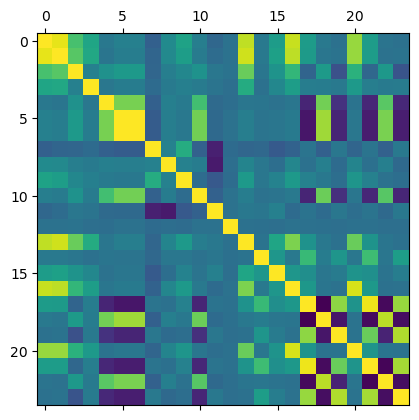

In [79]:
#making heat map
plt.matshow(res_sub.corr())
plt.savefig('res_sub.png')
plt.show()

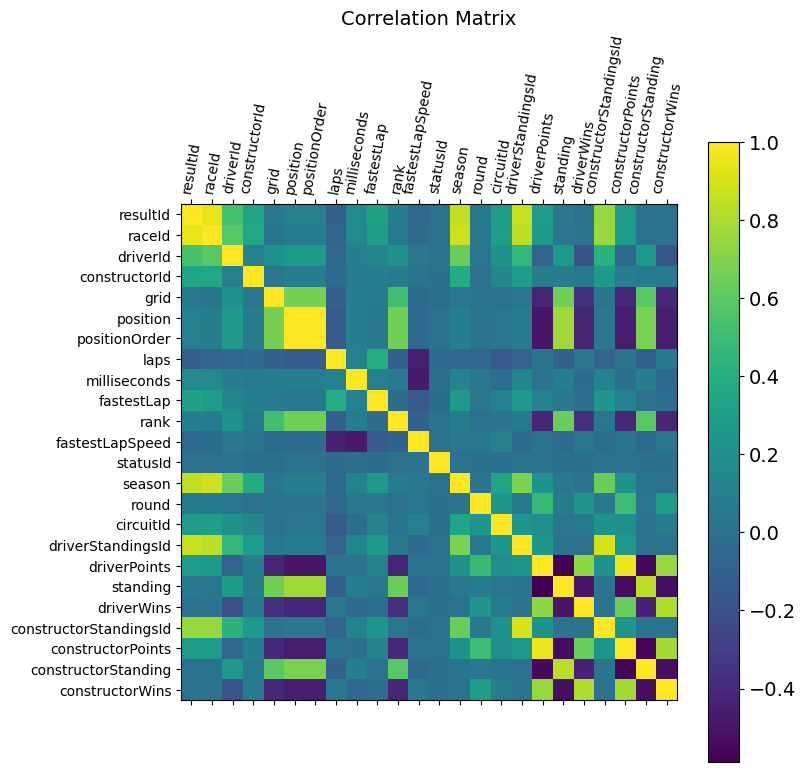

In [81]:
#detailing heat map
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(res_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(res_sub.shape[1]), res_sub.columns, fontsize=10, rotation=80) # x axis labels
plt.yticks(range(res_sub.shape[1]), res_sub.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig('res_sub.png')

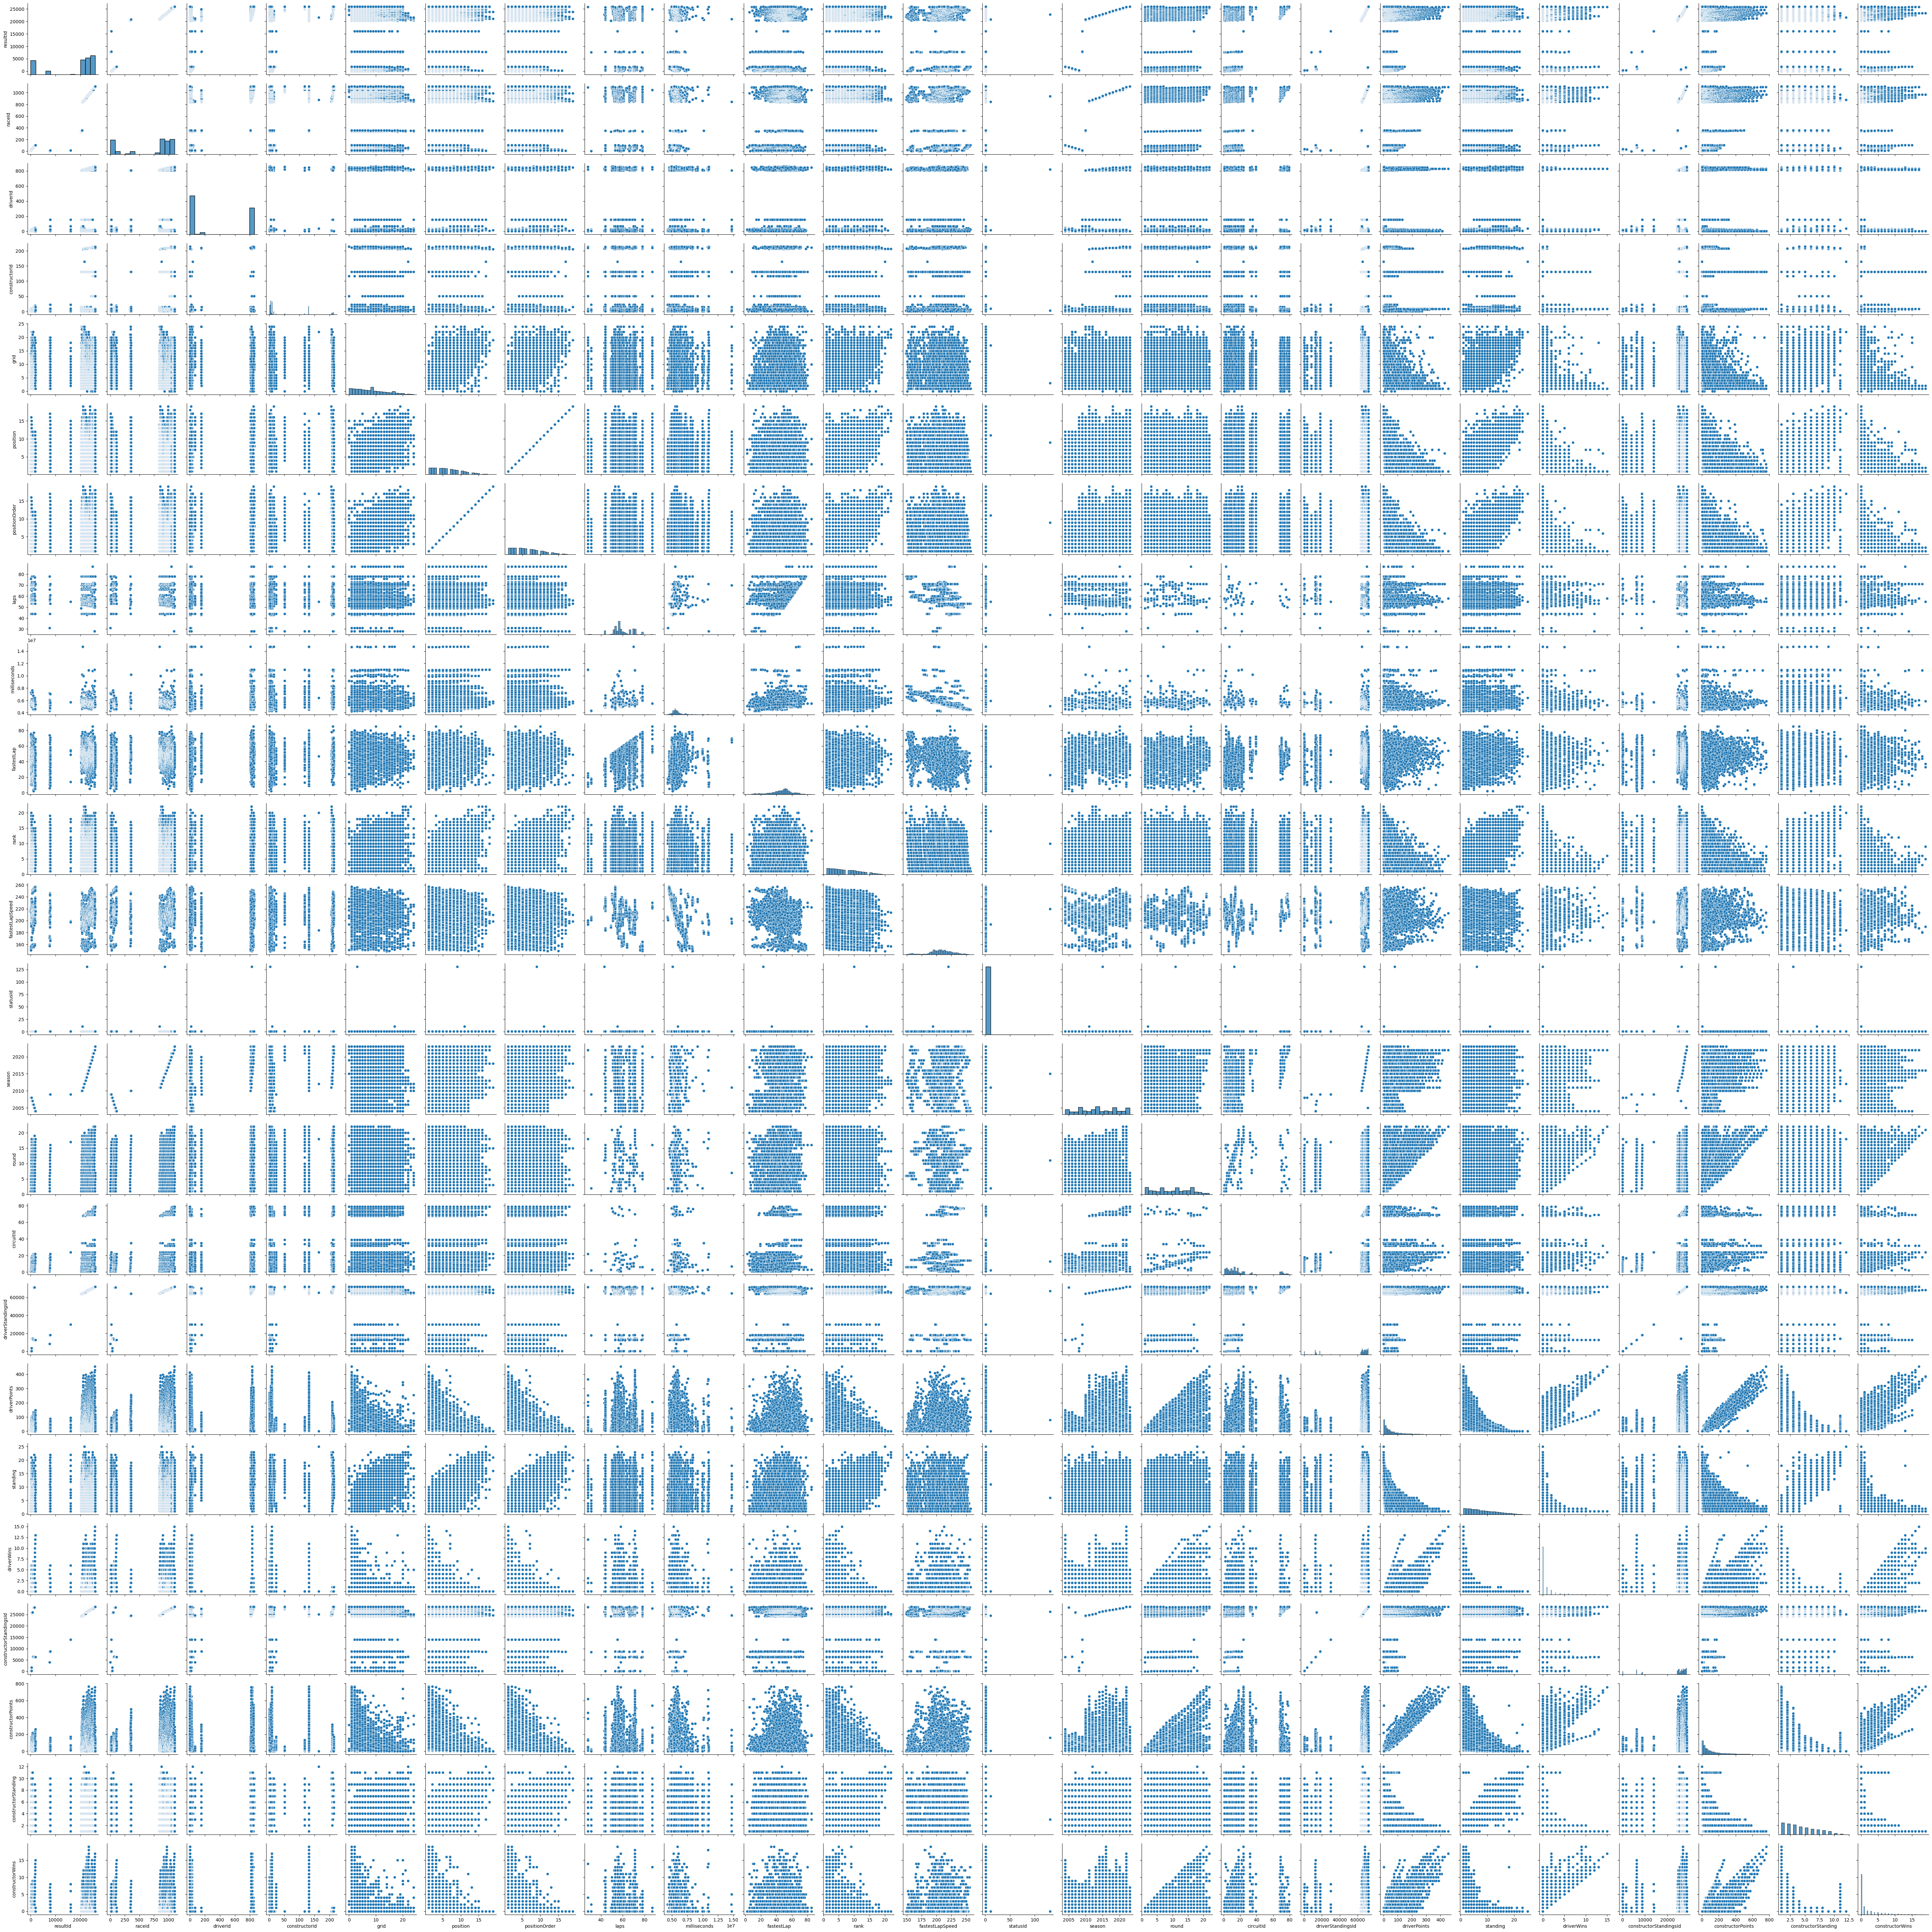

In [82]:
#making pair plot
p =sns.pairplot(res_sub)

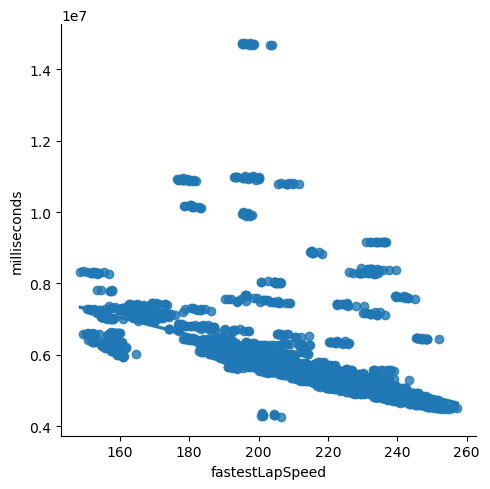

In [84]:
#scatter plot of interesting graph
sns.lmplot(x= 'fastestLapSpeed', y= 'milliseconds', data = res_sub)

In [7]:
#creating category
res_sub.loc[res_sub['fastestLapSpeed'] < 185, 'fastestLapSpCategory'] = 'slower'
res_sub.loc[(res_sub['fastestLapSpeed'] >= 185) & (res_sub['fastestLapSpeed'] < 220), 'fastestLapSpCategory'] = 'average'
res_sub.loc[res_sub['fastestLapSpeed'] >= 220, 'fastestLapSpCategory'] = 'faster'
res_sub['fastestLapSpCategory'].value_counts()

average    2402
faster      941
slower      432
Name: fastestLapSpCategory, dtype: int64

In [ ]:
#categorical plot
sns.set(style = 'ticks')
splot = sns.catplot(x = 'fastestLapSpeed', y ='milliseconds', hue = 'fastestLapSpCategory', data = res_sub)
splot